In [1]:
import matplotlib.pyplot as plt
import numpy as np

# I. Perceptrons and sigmoid neurons

## Exercise 1

Let $P_0$ be a perceptron, and $P_1$ be the perceptron obtained by multiplying $P_0$'s weights and biases by a constant $c>0$. For any neuron $N_0$ in $P_0$ with weights $(w_1, ..., w_n)$ and bias $b$, the weights and bias of the corresponding neuron $N_1$ in $P_1$ are respectively $(c w_1, ..., c w_n)$ and $c b$.

Given an input vector $(x_1, ..., x_n)$, $N_0$ fires if and only if $\sum_j w_j x_j + b > 0$. This condition is equivalent to $c (\sum_j w_j x_j + b) > 0$, i.e. to the firing of $N_1$. By induction on the number of layers, $P_0$ and $P_1$'s outputs are therefore identical.

## Exercise 2

As above, let $P_0$ be the original network, and $P_1$ be its modification. Let $N_0$ be a neuron in $P_0$ with weights $(w_1, ..., w_n)$ and bias $b$. 
* When fed with input $(x_1^c, ..., x_n^c)$, $N_0$ returns:
$$output_0^c = \mathbb{1}_{\mathbb{R}_+^*}(\sum_j w_j x_j^c + b)$$

* The corresponding neuron $N_1$ in $P_1$ returns:
$$output_1^c = \frac {1} {1 + exp[-c(\sum_j w_j x_j^c + b)]}$$

Suppose then that as $c \to \infty$, we have $(x_1^c, ..., x_n^c) \to (x_1^{\infty}, ..., x_n^{\infty})$, with $\sum_j w_j x_j^{\infty} + b \neq 0$. Then:

* $output_0^c \to \mathbb{1}_{\mathbb{R}_+^*}(\sum_j w_j x_j^{\infty} + b)$

* $output_1^c \to output_1^{\infty} = \lim\limits_{c \rightarrow +\infty}  \frac {1} {1 + exp[-c(\sum_j w_j x_j^c + b)]} = \mathbb{1}_{\mathbb{R}_+^*}(\sum_j w_j x_j^{\infty} + b)$

Therefore $\lim\limits_{c \rightarrow +\infty} output_0^c = \lim\limits_{c \rightarrow +\infty} output_1^c$. As $c \to \infty$ the behaviour of $N_1$ is exactly the same as that of $N_0$. This enables a *rigourous* proof (again, by induction on the layer) that both *networks* behave the same.

Consider now the case of an *input layer* neuron fed with $(x_1, ..., x_n)$, such that  $\sum_j w_j x_j + b = 0$ (here, the input does *not* depend on c). Then $output_0^c = 0$ whereas $output_1^c = 0.5$. Both neurons behave very differently, and so will the networks they are a part of.

# III. Learning with gradient descent


## Exercise 1: how Gradient Descent is optimal-ish.
* Suppose we're at some point $x \in \mathbb{R}^n$, and we're looking for a new point $x + \Delta v$ in $x$'s neighbourhood that will hopefully get us closer to the minimum. To achieve this, a good heuristic is to make $C(x + \Delta v)$ as small as possible. Since $C(x + \Delta v) \simeq C(x) + \nabla C \cdot \Delta v$, this is equivalent to minimizing the function $$f : \Delta v \in \mathbb{R}^n \mapsto  \nabla C \cdot \Delta v$$ subject to constraint: $||\Delta v|| = \epsilon$.



* Cauchy-Schwarz shows that: $| f(\Delta v) | = |\nabla C \cdot \Delta | \leq ||\nabla C|| \times ||\Delta v||$. Thus $f(\Delta v) \geq - \epsilon ||\nabla C||$. Moreover, taking $\eta = \frac {\epsilon} {||\nabla C||}$ yields $f(- \eta \nabla C) = - \epsilon ||\nabla C||$, with $||- \eta \nabla C|| = \epsilon$.



* Therefore taking $\Delta v = - \eta \nabla C$ solves the optimization problem. Gradient descent is **locally** optimal: it makes the greedy choice.

## Exercise 2: let's code Gradient Descent in 1D !

The following function finds the minimum of a smooth function $f: \mathbb{R}  \to \mathbb{R}$ using gradient descent with a fixed learning rate. It also plots both the function and the steps it makes until the minimum. It takes as arguments:
* the function itself, $f$
* $f' = \nabla f$, the derivative of $f$ (computing derivatives, symbolically or numerically, is possible but tedious)
* the learning rate $\eta$
* the stopping parameter, $\epsilon$: the function stops when $|| \nabla f || \leq \epsilon$

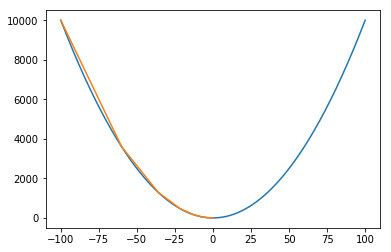

-0.0036561584400629744

In [2]:
def GD_minimum(f, f_prime, x_0, eta, epsilon):
    x_func = np.linspace(-np.abs(x_0), np.abs(x_0), 1000)
    y_func = f(x_func)
    
    x_values = [x_0]
    y_values = [f(x_0)]
    
    x_temp = x_0
    
    while np.abs(f_prime(x_temp)) > epsilon:
        x_temp -= eta*f_prime(x_temp)
        x_values.append(x_temp)
        y_values.append(f(x_temp))
    
    plt.plot(x_func, y_func)
    plt.plot(x_values, y_values)
    plt.show()
    
    return x_temp

def f_0(x):
    return x*x

def f_0_prime(x):
    return 2*x

GD_minimum(f_0, f_0_prime, -100, 0.2, 0.01)

Note that the algorithm stops at a point $x^*$ when $\nabla f(x^*) \simeq 0$. Yet we know that even $\nabla f(x^*) = 0$ is not a sufficient condition to ensure $x^*$'s optimality: picture a saddle. One important situation when this is enough is when $f$ is convex. 

## Exercise 3: Stochastic Gradient Descent and Online learning

**Stochastic gradient descent** is a computationally inexpensive variant of gradient descent for neural networks. Remember, the formula for the cost function: $C(w, b) = \frac {1} {2n} \sum \limits_{x \in X} ||y(x)-a||^2 $ with $X$ the training set. 

Taking $C_x := ||y(x)-a||^2$, we can rewrite $C(w, b) = \frac {1} {2n} \sum \limits_{x \in X} C_x $. Computing $\nabla C(w, b) = \frac {1} {n} \sum \limits_{x \in X} \nabla C_x $ would involve a gradient calculation for every training input. Instead, SGD chooses a **mini-batch** $\{ X_1, ..., X_m \} \subset X$ of size $m << n$ at **random**, and computes $\frac {1} {m} \sum \limits_{1 \leq i \leq m} \nabla C_{X_i} \simeq \frac {1} {n} \sum \limits_{x \in X} \nabla C_x$ to adjust the weights and biases.

**Online learning** is SGD with mini-batches of size $1$. This is especially useful when training inputs are being added during learning. However, there is no guarantee that each step will approximate the gradient correctly, whereas results such as the *central limit theorem* show that $\frac {1} {m} \sum \limits_{1 \leq i \leq m} \nabla C_{X_i}$ is close enough to the actual gradient for reasonably big values of $m$.

# IV. Implementing our network to classify digits

Copy pasted some of Mike's code here.

## 1. Importing the data
This is taken from ``mnist_loader.py```


In [3]:
#### Libraries
# Standard library
import pickle
import gzip

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('NNDL_file/data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f,encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e



## 2. Building the Neural Network

We start with a ``Network`` class:
* ``sizes`` is a list containing the number of neurons in each layer
* biases and weights are initialized randomly, from normal distributions


In [4]:
class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(sizes[:-1], sizes[1:])]

Let's create an instance ``net`` of this class:

In [5]:
net = Network([2, 3, 1])

def M(i):
    return net.weights[i]

print(M(0))
print()
print(M(1))

net.biases

[[-0.66141604  0.35533732]
 [ 0.32933628  1.39098231]
 [ 0.69897283  0.25768621]]

[[-0.54250587  0.77577761  3.00767679]]


[array([[ 2.08337569],
        [-1.4889273 ],
        [ 0.01552329]]), array([[0.18657768]])]

$M(i)$ is a numpy matrix storing the weights connecting neuron layers $i+1$ and $i+2$. To be more precise, $[M(i)]_{jk}$ is the weight for the connection between the $k^{th}$ neuron in the second layer, and the $j^{th}$ neuron in the third layer. This notation is counterintuitive: at first glance, using $M(i)$'s transpose would be easier. However, using $M(i)$ will simplify the algebra later.

The vector output of all the neurons in layer $i+2$ is given by:

$$ output_{i+2} = \sigma (M(i) \times output_{i+1} + b_{i+2}) \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ \ \ \             (update)$$

The proof for this is easy, it's just important not to get too confused with the notation, which is further complicated by the Python conventions.

## 3. Computing the output of a network

First we define the sigmoid function, which is vectorized automatically:

In [6]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

We then add a method to the Network class, called ``feedforward``:
* argument: input $a$ for the network, of type ``(n, 1) Numpy ndarray``
* returns: the output of the network if $a$ is input

In [7]:
def feedforward(self, a):
    """Return the output of the network if "a" is input."""
    for b, w in zip(self.biases, self.weights):
        a = sigmoid(np.dot(w, a)+b)
    return a


## 4. Stochastic Gradient Descent

Now to the Stochastic Gradient Descent itself. The code works as follows:

In each epoch, the algorithm has to build mini-batches:
* it starts by randomly shuffling the training data 
* it then partitions it into mini-batches of the appropriate size 

Then, the program has to modify the weights and biases:
* for each mini-batch, ``self.update_mini_batch(mini_batch, eta)`` updates the network weights and biases according to a single iteration of gradient descent using just the training data in ``mini_batch``. 

In [8]:
    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The "training_data" is a list of tuples
        "(x, y)" representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If "test_data" is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            np.random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j))


"Wait so ``self.update_mini_batch(mini_batch, eta)`` is doing all the work here right?"Yes. Let's see how it works:

In [9]:
    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta"
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw 
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb 
                       for b, nb in zip(self.biases, nabla_b)]


"Wait so it's ``self.backprop(x, y)`` that's doing all the work here in fact?" Yes again. Backpropagation is an algorithm that computes the gradient of the cost function. We'll see how it works in more detail in the next chapter. For now we'll assume we know that it works, and use it with a clear conscience.

## 5. A few additional functions so we can test 


So far we've coded the following classes and functions:
* ``Network`` class
* ``feedforward`` method
* ``update_mini_batch`` method
* ``SGD`` method
* ``sigmoid`` function

We need a few additional functions:
* the ``backprop`` method, as mentioned above
* the ``cost_derivative`` method, that is used in backprop
* ``sigmoid_prime``, the derivative of the sigmoid function
* an ``evaluate`` method that returns the number of inputs for which the network got it right


Below is the code for all these guys: we're not interested in them right now.

In [10]:
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The "training_data" is a list of tuples
        "(x, y)" representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If "test_data" is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            np.random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta"
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw 
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb 
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))
    

## 6. Testing the whole thing 



In [11]:
training_data, validation_data, test_data = load_data_wrapper()
test_data = list(test_data)
validation_data = list(validation_data)
training_data = list(training_data)

MNIST inputs are $28 \times 28$ images, therefore the **input layer** is made up of $28 \times 28 = 784$ input neurons.
The output is an individual digit: as above, the **output layer** therefore contains $9$ neurons.
We will here be using one **hidden layer** containing $30$ neurons.


In [12]:
net = Network([784, 30, 10])

Let's use Stochastic Gradient Descent on our network, with:
* $30$ epochs
* mini-batches of size $10$
* a learning rate $\eta = 3.0$

In [13]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 9044 / 10000
Epoch 1: 9199 / 10000
Epoch 2: 9324 / 10000
Epoch 3: 9333 / 10000
Epoch 4: 9319 / 10000
Epoch 5: 9376 / 10000
Epoch 6: 9364 / 10000
Epoch 7: 9355 / 10000
Epoch 8: 9406 / 10000
Epoch 9: 9439 / 10000
Epoch 10: 9372 / 10000
Epoch 11: 9450 / 10000
Epoch 12: 9424 / 10000
Epoch 13: 9463 / 10000
Epoch 14: 9433 / 10000
Epoch 15: 9430 / 10000
Epoch 16: 9447 / 10000
Epoch 17: 9446 / 10000
Epoch 18: 9443 / 10000
Epoch 19: 9448 / 10000
Epoch 20: 9421 / 10000
Epoch 21: 9456 / 10000
Epoch 22: 9457 / 10000
Epoch 23: 9456 / 10000
Epoch 24: 9446 / 10000
Epoch 25: 9455 / 10000
Epoch 26: 9468 / 10000
Epoch 27: 9440 / 10000
Epoch 28: 9474 / 10000
Epoch 29: 9459 / 10000


## 7. (Very) Minor differences with Mike's algorithm

* This runs on Python 3 so
    - Because zip doesn't return a list anymore, I converted training, test and validation data into lists (https://stackoverflow.com/questions/27431390/typeerror-zip-object-is-not-subscriptable) 
    - I used ``range`` instead of ``xrange``
    - I replaced ``cPickle`` with ``pickle``, and ``pickle.load(f)`` 
    

## 8. Exercise: a network without hidden layers

In [14]:
net_two_layers = Network([784, 10])

Let's use Stochastic Gradient Descent on this network too, with, as above:
* $30$ epochs
* mini-batches of size $10$
* a learning rate $\eta = 3.0$

In [15]:
net_two_layers.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 7203 / 10000
Epoch 1: 7382 / 10000
Epoch 2: 7441 / 10000
Epoch 3: 7468 / 10000
Epoch 4: 7438 / 10000
Epoch 5: 7430 / 10000
Epoch 6: 7463 / 10000
Epoch 7: 7480 / 10000
Epoch 8: 7483 / 10000
Epoch 9: 7500 / 10000
Epoch 10: 7501 / 10000
Epoch 11: 7498 / 10000
Epoch 12: 8307 / 10000
Epoch 13: 8284 / 10000
Epoch 14: 8317 / 10000
Epoch 15: 8333 / 10000
Epoch 16: 8362 / 10000
Epoch 17: 8356 / 10000
Epoch 18: 8361 / 10000
Epoch 19: 8339 / 10000
Epoch 20: 8347 / 10000
Epoch 21: 8316 / 10000
Epoch 22: 8334 / 10000
Epoch 23: 8333 / 10000
Epoch 24: 8354 / 10000
Epoch 25: 8342 / 10000
Epoch 26: 8345 / 10000
Epoch 27: 8354 / 10000
Epoch 28: 8348 / 10000
Epoch 29: 8354 / 10000


It's not as good.